In [44]:
%load_ext dotenv
%dotenv

In [45]:
import os

workdata_path=os.environ['work']

In [3]:
workdata_path

'/home/ea-ibf-climada/'

In [64]:
import xarray as xr

#db=xr.open_dataset('/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/tamsat/for_training/outputs/ens_mean_wrsi_OND2022_20221005_33.5_42.0_-4.8_5.5.nc')


ens_db=f'{workdata_path}tamsat_workshpdata/for_training/trail6_outputs/ensemble_forecast_wrsi_OND2022_20221005_21.8_51.374_-11.7_23.1.nc'

db=xr.open_dataset(ens_db)

#db['time']

da=db.loc[dict(time=slice('2022-10-01T00:00:00.000000000'))]
#da.plot()
da1=da.loc[dict(ens_year=slice('2019'))]

#da2=da1.reset_coords(names="ens_year",drop=True)
#da1.plot((column="elevation_max", legend=True)
#da1=da.squeeze(["ens_year"], drop=True)

#da2=da1.reset_index('ens_year', drop=False)
#da3=da2.reset_coords(names="ens_year",drop=True)
#da2

db1=da1.squeeze("ens_year")
#db1[0].plot()

#db1[0].plot.scatter()
db2=db1.loc[dict(time=slice('2022-10-01T00:00:00.000000000'))]
#db2.plot.scatter()

import cf_xarray as cfxr
db2.beta_c4grass.cf.isel(time=0).cf.plot(x="longitude", y="latitude")

FileNotFoundError: [Errno 2] No such file or directory: b'/home/ea-ibf-climada/tamsat_workshpdata/for_training/trail6_outputs/ensemble_forecast_wrsi_OND2022_20221005_21.8_51.374_-11.7_23.1.nc'

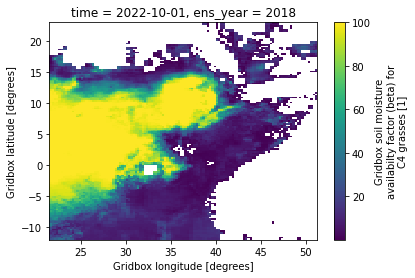

In [53]:
db=xr.open_dataset(ens_db)
import cf_xarray as cfxr
db.beta_c4grass.cf.isel(time=0,ens_year=13).cf.plot(x="longitude", y="latitude")

In [55]:
db1=db.beta_c4grass.cf.isel(time=0,ens_year=13)
db1

<xarray.DataArray 'beta_c4grass' (longitude: 119, latitude: 140)>
array([[25.09    , 19.72    , 22.14    , ...,       nan,       nan,       nan],
       [26.869999, 23.75    , 16.449999, ...,       nan,       nan,       nan],
       [31.779999, 25.369999, 15.98    , ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 2022-10-01
  * longitude  (longitude) float32 21.62 21.88 22.12 22.38 ... 50.62 50.88 51.12
  * latitude   (latitude) float32 -11.88 -11.62 -11.38 ... 22.38 22.62 22.88
    ens_year   int64 2018
Attributes:
    long_name:  Gridbox soil moisture availabilty factor (beta) for C4 grasses
    units:      1

In [57]:
import rioxarray

#rds = rioxarray.open_rasterio(ens_db)
db2=db1.transpose('latitude', 'longitude')
db2.rio.to_raster(f'{workdata_path}tamsat_workshpdata/for_training/trail6_outputs/planet_scope.tif')

In [6]:
from climada_petals.hazard.drought import Drought

from climada_petals.entity.impact_funcs.drought import ImpfDrought
# from climada.entity import Entity
from climada.entity import ImpactFuncSet
from climada.engine import Impact
from climada_petals.entity.exposures.spam_agrar import SpamAgrar
import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

## impact function

In [2]:
"""Initialize Impact function"""
dr_impf = ImpactFuncSet()
impf_def = ImpfDrought.from_default_sum()
"""set impact function: for min: set_default; for sum-thr: set_default_sumthr; for sum: set_default_sum"""
#impf_def.set_default()
#impf_def.set_default_sumthr()

dr_impf.append(impf_def)

In [3]:
impf_def.name

'drought default sum'

In [10]:
dmdd=np.array(impf_def.mdd) 
dpaa=np.array(impf_def.paa)
dint=np.array(impf_def.intensity)

#impf_def.mdd * impf_def.paa * 100
len(dmdd),len(dpaa),len(dint)

print(dmdd)
print(dpaa)
print(dint)
#dmdd=np.array([1.0, 0.65, 0.5, 0.3, 0., 0.])
#dpaa=np.array([1.0, 1.0, 1.0, 1.0, 0.0, 0.0])
#dint=np.array([-15.0, -12.0, -9.0, -7.0, -5.0, 0.0])
#dmdd * dpaa * 100
#np.multiply(dmdd * dpaa)


[1.   0.65 0.5  0.3  0.   0.  ]
[1 1 1 1 0 0]
[-15 -12  -9  -7  -5   0]


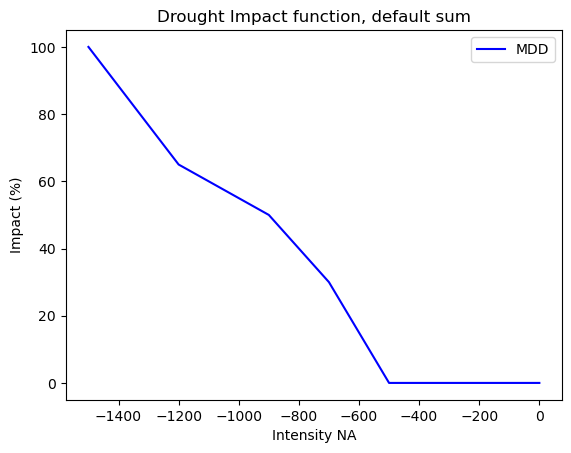

In [9]:
 _, axis = plt.subplots(1, 1)

title = 'Drought Impact function, default sum'
#if self.name != str(self.id):
#    title += ': %s' % self.name
axis.set_xlabel('Intensity NA')
axis.set_ylabel('Impact (%)')
axis.set_title(title)
#axis.plot(impf_def.intensity, impf_def.mdd * 100, 'b', label='MDD')
axis.plot(dint*100, dmdd * 100, 'b', label='MDD')
#axis.plot(dint*100, dpaa * 100, 'r', label='PAA')
#axis.plot(dint*100, dmdd * dpaa * 100, 'k--', label='MDR')

#axis.set_xlim((dint.min(), dint.max()))

#MDD- Mean damage (impact) degree for each intensity (numbers in [0,1])
#PAA- Percentage of affected assets (exposures) for each intensity (numbers in [0,1])
#MDR- The mean damage ratio
axis.legend()

## generate impact function 
following https://climada-python.readthedocs.io/en/stable/tutorial/climada_entity_ImpactFuncSet.html

In [38]:
import numpy as np
from climada.entity import ImpactFunc

# We initialise a dummy ImpactFunc for tropical cyclone wind damage to building.
# Giving the ImpactFunc an arbitrary id 3.
imp_fun = ImpactFunc()
imp_fun.haz_type = 'TC'
imp_fun.id = 3
imp_fun.name = 'TC building damage'
# provide unit of the hazard intensity
imp_fun.intensity_unit = 'm/s'
# provide values for the hazard intensity, mdd, and paa
imp_fun.intensity = np.linspace(0, 100, num=15)
imp_fun.mdd = np.concatenate((np.array([0]),np.sort(np.random.rand(14))), axis=0)
imp_fun.paa = np.concatenate((np.array([0]),np.sort(np.random.rand(14))), axis=0)
# check if the all the attributes are set correctly
print(imp_fun.check())



None


In [12]:
print('Mean damage ratio at intensity 18.7 m/s: ', imp_fun.calc_mdr(18.7))


Mean damage ratio at intensity 18.7 m/s:  0.05530833879421721


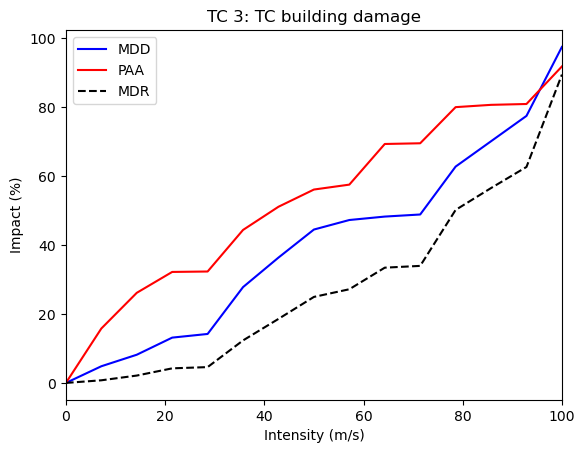

In [39]:
imp_fun.plot();

In [40]:
from climada.entity import ImpactFuncSet
from climada.util import ENT_TEMPLATE_XLS
import matplotlib.pyplot as plt

# provide absolute path of the input excel file
#file_name = ENT_TEMPLATE_XLS

In [46]:
file_name=f'{workdata_path}drought/ibf_drought_impact_ea_v0.xlsx'

In [47]:
imp_set_xlsx = ImpactFuncSet.from_excel(file_name)

<AxesSubplot:title={'center':'DR 1: Drought on crop damage'}, xlabel='Intensity (WRSI value)', ylabel='Impact (%)'>

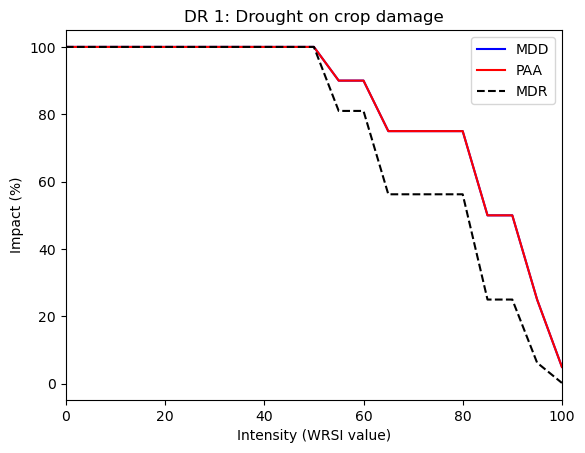

In [48]:
imp_set_xlsx.plot()

# Hazard data

In [ ]:
from climada_petals.hazard.drought import Drought

d.set_area(-11.745695,21.838949 , 23.145147, 51.415695)

d.set_file_name(spei_file_name)

### For using the WRSI average forecast testing first the spei03 sample data

In [57]:
import xarray as xr

import rioxarray

data_path='/home/del_data/wrsi_output/'

sp_db=xr.open_dataset(f'{data_path}spei03.nc')
sp_db

min_lat=-11.745695
max_lat=21.838949
min_lon=23.145147
max_lon=51.415695

#cropped_ds = sp_db.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
#cropped_ds

sp_db.rio.write_crs('epsg:4326', inplace = True)

cropped_ds = sp_db.rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat)

#cropped_ds1=cropped_ds.loc[dict(time=slice(['1981-01-01T00:00:00.000000000','1981-02-01T00:00:00.000000000']))]

cropped_ds1=cropped_ds.sel(time=slice('1981-01-01T00:00:00.000000000','1982-01-01T00:00:00.000000000'))
cropped_ds1.to_netcdf(f'{data_path}spei03_v6.nc')

In [45]:
cropped_ds1

<xarray.Dataset>
Dimensions:      (lat: 672, lon: 567, time: 2)
Coordinates:
  * lat          (lat) float32 21.83 21.77 21.73 21.67 ... -11.62 -11.68 -11.73
  * lon          (lon) float32 23.12 23.17 23.23 23.27 ... 51.33 51.38 51.42
  * time         (time) datetime64[ns] 1981-01-01 1981-02-01
    spatial_ref  int64 0
Data variables:
    spei         (time, lat, lon) float32 ...
Attributes:
    title:                     High resolution Standardized Precipitation Eva...
    institution:               School of Geography and the Environment, Unive...
    version:                   1.0
    creators:                  Jian Peng, Simon Dadson, Feyera Hirpa, Ellen D...
    source:                    The dataset was produced using CHIRPS precipit...
    comment:                   The dataset was produced as part of the UK Spa...
    time_coverage:             1981.01-2016.12
    time_coverage_resolution:  monthly
    spatial_resolution:        5km

### get the acreage of wrsi output

In [27]:
import pandas as pd

wrsi_mean_path=f'{data_path}/20220820/ens_mean_wrsi_OND2022_20220821_21.838949_51.415695_-11.745695_23.145147.nc'

db=xr.open_dataset(wrsi_mean_path)
db1=db.rename({'longitude':'lon','latitude':'lat'})

times = pd.date_range("2022/10/01","2022/10/01",freq='D',closed='left')

time_da = xr.DataArray(times, [('time', times)])

dst = db1.expand_dims(time=time_da)
dst['spei'] = dst['__xarray_dataarray_variable__']
dst = dst.drop(['__xarray_dataarray_variable__'])
#dst.to_netcdf(f'{data_path}/20220820/ens_mean_wrsi_v2.nc')

# climada drought raised issue of different grid size, so regridding data to suite to spei

import xesmf as xe

regridder = xe.Regridder(dst, sp_db, "bilinear")

/tmp/ipykernel_46/1939272911.py:8: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  times = pd.date_range("2022/10/01","2022/10/01",freq='D',closed='left')


In [29]:
ds_out = regridder(dst)
ds_out.to_netcdf(f'{data_path}/20220820/ens_mean_wrsi_v3.nc')

/root/miniconda3/envs/climada_env/lib/python3.8/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


In [58]:
from climada_petals.hazard.drought import Drought

d = Drought()

d.set_area(-11.745695,21.838949 , 23.145147, 51.415695)

#d.set_file_path(f'{data_path}/20220820/ens_mean_wrsi_v3.nc')

d.set_file_path(f'{data_path}spei03_v6.nc')
wrsi_haz = d.setup()

#this is working after 3 minutes

In [59]:
wrsi_haz

## regridding and adding into drought

In [63]:
import pandas as pd

wrsi_mean_path=f'{data_path}/20220820/ensemble_forecast_wrsi_OND2022_20220821_21.838949_51.415695_-11.745695_23.145147.nc'

db=xr.open_dataset(wrsi_mean_path)
db1=db.rename({'longitude':'lon','latitude':'lat'})
db2=db1.loc[dict(ens_year=slice('2019'))]
db3=db2.squeeze("ens_year")
#times = pd.date_range("2022/10/01","2022/10/01",freq='D',closed='left')

#time_da = xr.DataArray(times, [('time', times)])

#dst = db1.expand_dims(time=time_da)
#dst['spei'] = dst['__xarray_dataarray_variable__']
#dst = dst.drop(['__xarray_dataarray_variable__'])
#dst.to_netcdf(f'{data_path}/20220820/ens_mean_wrsi_v2.nc')

# climada drought raised issue of different grid size, so regridding data to suite to spei

#import xesmf as xe

#regridder = xe.Regridder(dst, sp_db, "bilinear")

ValueError: cannot select a dimension to squeeze out which has length greater than one

## removing ens_year and creating data array into dataset

In [68]:
db1=db.beta_c4grass.cf.isel(ens_year=13)
#db1['spei'] = db1['beta_c4grass']
#db2 = db1.drop(['beta_c4grass'])
#db2
db2 = db1.to_dataset(name = 'spei')
db2

<xarray.Dataset>
Dimensions:    (time: 133, latitude: 140, longitude: 119)
Coordinates:
    ens_year   int64 2018
  * time       (time) datetime64[ns] 2022-08-21 2022-08-22 ... 2022-12-31
  * latitude   (latitude) float32 -11.62 -11.38 -11.12 ... 22.62 22.88 23.12
  * longitude  (longitude) float32 21.88 22.12 22.38 22.62 ... 50.88 51.12 51.38
Data variables:
    spei       (longitude, latitude, time) float32 ...

In [70]:
sp_db=xr.open_dataset(f'{data_path}spei03_v6.nc')

import xesmf as xe

regridder = xe.Regridder(db2, sp_db, "bilinear")

In [72]:
ds_out = regridder(db2)
ds_out.to_netcdf(f'{data_path}/20220820/ens_mean_wrsi_v4.nc')

/root/miniconda3/envs/climada_env/lib/python3.8/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


In [ ]:
dd

In [73]:
from climada_petals.hazard.drought import Drought

d = Drought()

d.set_area(-11.745695,21.838949 , 23.145147, 51.415695)

d.set_file_path(f'{data_path}/20220820/ens_mean_wrsi_v4.nc')

#d.set_file_path(f'{data_path}spei03_v6.nc')
wrsi_haz = d.setup()

ValueError: Invalid Hazard.event_name size: 0 != 10.

## trail 2

## adding sythetic year data

In [81]:
import pandas as pd
import xesmf as xe

# wrsi_mean_path=f'{data_path}/20220820/ensemble_forecast_wrsi_OND2022_20220821_21.838949_51.415695_-11.745695_23.145147.nc'

# db=xr.open_dataset(wrsi_mean_path)

# db1=db.beta_c4grass.cf.isel(ens_year=13)
# #db1['spei'] = db1['beta_c4grass']
# #db2 = db1.drop(['beta_c4grass'])
# #db2
# db2 = db1.to_dataset(name = 'spei')
# db2

# sp_db=xr.open_dataset(f'{data_path}spei03_v6.nc')



#regridder = xe.Regridder(db2, sp_db, "bilinear")

ds_out = regridder(db2)

updated_times = pd.date_range(start='1/1/2011', periods=133, freq='M')

#ds_out["time"] = ("time", updated_times)

#ds_out.to_netcdf(f'{data_path}/20220820/ens_mean_wrsi_v4.nc')

#ds_out1 = ds_out.expand_dims(time=updated_times)

/root/miniconda3/envs/climada_env/lib/python3.8/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


ValueError: Dimension time already exists.

In [85]:
latitude=ds_out.lat.data
longitude=ds_out.lon.data
temperature=ds_out.spei.data



aa = xr.Dataset(
    coords={
        "time": updated_times,"lat": (latitude),"lon": (longitude)
        },
    data_vars={
        "spei":(( "time", "lat","lon"),temperature),
        }
)

In [87]:
aa.to_netcdf(f'{data_path}/20220820/ens_mean_wrsi_v5.nc')

In [88]:
from climada_petals.hazard.drought import Drought

d = Drought()

d.set_area(-11.745695,21.838949 , 23.145147, 51.415695)

d.set_file_path(f'{data_path}/20220820/ens_mean_wrsi_v5.nc')

#d.set_file_path(f'{data_path}spei03_v6.nc')
wrsi_haz = d.setup()

KeyboardInterrupt: 

## trail 3
the 131 months are taking too much time 

In [4]:
import pandas as pd
import xesmf as xe
import xarray as xr

data_path='/home/del_data/wrsi_output/'

wrsi_mean_path=f'{data_path}20220820/ensemble_forecast_wrsi_OND2022_20220821_21.838949_51.415695_-11.745695_23.145147.nc'

db=xr.open_dataset(wrsi_mean_path)

db1=db.sel(time=slice("2022-10-01", "2022-10-31"))

db2=db1.beta_c4grass.cf.isel(ens_year=13)

sp_db=xr.open_dataset(f'{data_path}spei03_v6.nc')



regridder = xe.Regridder(db2, sp_db, "bilinear")

ds_out = regridder(db2)

/root/miniconda3/envs/climada_env/lib/python3.8/site-packages/xarray/core/dataarray.py:810: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/root/miniconda3/envs/climada_env/lib/python3.8/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


In [8]:
ds_out1 = ds_out.to_dataset(name = 'spei')

updated_times = pd.date_range(start='1/1/2011', periods=31, freq='M')

latitude=ds_out1.lat.data
longitude=ds_out1.lon.data
temperature=ds_out1.spei.data



aa = xr.Dataset(
    coords={
        "time": updated_times,"lat": (latitude),"lon": (longitude)
        },
    data_vars={
        "spei":(( "time", "lat","lon"),temperature),
        }
)

aa.to_netcdf(f'{data_path}/20220820/ens_mean_wrsi_v6.nc')

In [10]:
from climada_petals.hazard.drought import Drought

d = Drought()

d.set_area(-11.745695,21.838949 , 23.145147, 51.415695)

d.set_file_path(f'{data_path}/20220820/ens_mean_wrsi_v6.nc')

#d.set_file_path(f'{data_path}spei03_v6.nc')
wrsi_haz = d.setup()

KeyboardInterrupt: 

## trial 4

manually setting the hazard based on https://climada-python.readthedocs.io/en/stable/tutorial/climada_hazard_Hazard.html#Part3

Check centroids borders: (-72.0, -3.0, -52.0, 22.0)
Check centroids borders: (-72.25, -3.25, -51.75, 22.25)


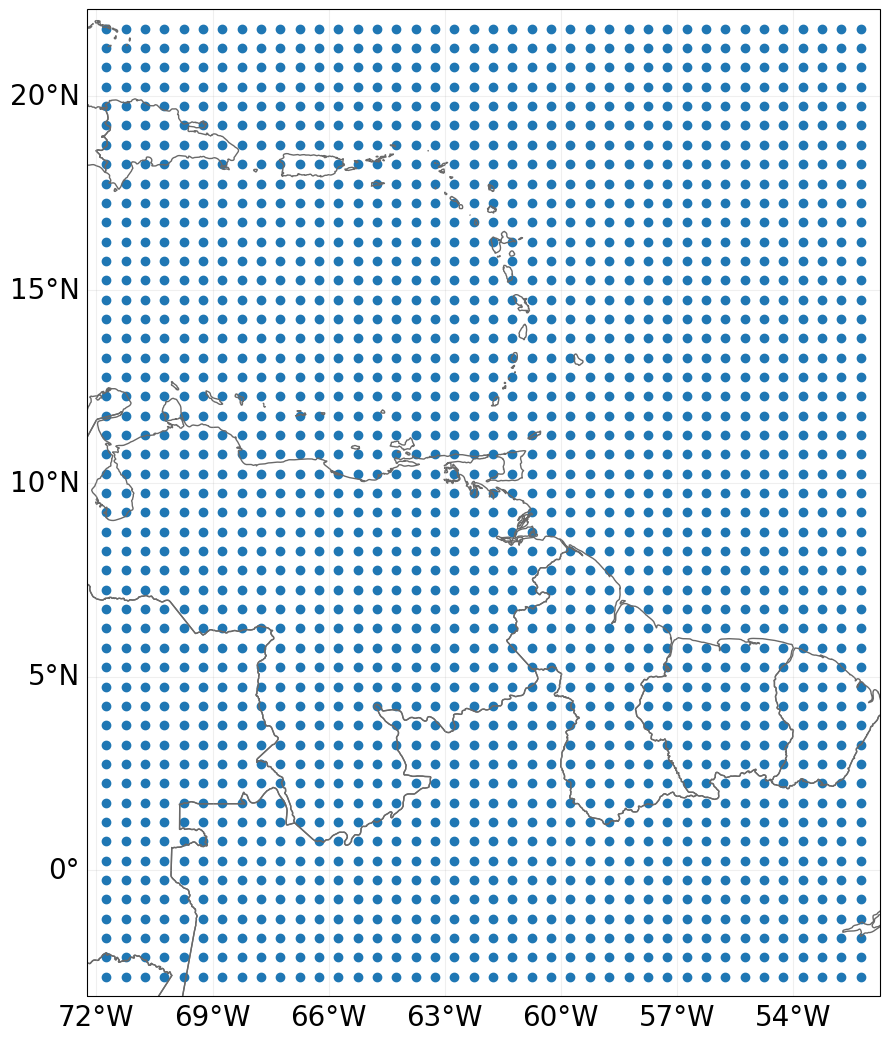

In [11]:
# setting raster
import numpy as np
from scipy import sparse
from climada.hazard import Hazard, Centroids

# raster info:
# border upper left corner (of the pixel, not of the center of the pixel)
xf_lat = 22
xo_lon = -72
# resolution in lat and lon
d_lat = -0.5 # negative because starting in upper corner
d_lon = 0.5 # same step as d_lat
# number of points
n_lat = 50
n_lon = 40

n_ev = 10 # number of events

haz = Hazard('TC')
haz.centroids = Centroids.from_pix_bounds(xf_lat, xo_lon, d_lat, d_lon, n_lat, n_lon) # default crs used
haz.intensity = sparse.csr_matrix(np.random.random((n_ev, haz.centroids.size)))
haz.units = 'm'
haz.event_id = np.arange(n_ev, dtype=int)
haz.event_name = ['ev_12', 'ev_21', 'Maria', 'ev_35', 'Irma', 'ev_16', 'ev_15', 'Edgar', 'ev_1', 'ev_9']
haz.date = [721166, 734447, 734447, 734447, 721167, 721166, 721167, 721200, 721166, 721166]
haz.orig = np.zeros(n_ev, bool)
haz.frequency = np.ones(n_ev)/n_ev
haz.fraction = haz.intensity.copy()
haz.fraction.data.fill(1)
haz.check()
print('Check centroids borders:', haz.centroids.total_bounds)
haz.centroids.plot()

# using from_pnt_bounds, the bounds refer to the bounds of the center of the pixel
left, bottom, right, top = xo_lon, -3.0, -52.0, xf_lat
haz.centroids = Centroids.from_pnt_bounds((left, bottom, right, top), 0.5) # default crs used
print('Check centroids borders:', haz.centroids.total_bounds)

In [13]:
aa=sparse.csr_matrix(np.random.random((n_ev, haz.centroids.size)))
aa.shape

(10, 2091)

### reading from raster

In [14]:
import numpy as np
from climada.hazard import Hazard
from climada.util.constants import HAZ_DEMO_FL
# to hide the warnings
import warnings
warnings.filterwarnings('ignore')

# read intensity from raster file HAZ_DEMO_FL and set frequency for the contained event
haz_ven = Hazard.from_raster([HAZ_DEMO_FL], attrs={'frequency':np.ones(1)/2}, haz_type='FL')
haz_ven.check()

In [15]:
HAZ_DEMO_FL

PosixPath('/root/climada/demo/data/SC22000_VE__M1.grd.gz')

In [29]:
import xarray as xr

wrsi_mean_path=f'{data_path}/20220820/ens_mean_wrsi_OND2022_20220821_21.838949_51.415695_-11.745695_23.145147.nc'

db1=xr.open_dataset(wrsi_mean_path)
#db1=db.rename({'longitude':'lon','latitude':'lat'})

times = pd.date_range("2022/10/01","2022/10/01",freq='D',closed='left')

In [32]:
import rioxarray 



db1['spei'] = db1['__xarray_dataarray_variable__']
db2 = db1.drop(['__xarray_dataarray_variable__'])

#db3=db2.transpose('lat', 'lon')

#db3=db2.spei.cf

db3=db2.transpose( 'latitude', 'longitude')

db3.rio.to_raster(f'{data_path}planet_scope_v1.tif',recalc_transform=False)

#db3

In [35]:
haz_ven = Hazard.from_raster([f'{data_path}planet_scope_v1.tif'], dst_crs='epsg:4326',attrs={'frequency':np.ones(1)/2}, haz_type='DR')
haz_ven.check()
print('\n Solution 1:')
print('centroids CRS:', haz.centroids.crs)
print('raster info:', haz.centroids.meta)


 Solution 1:
centroids CRS: EPSG:4326
raster info: {'width': 41, 'height': 51, 'crs': 'EPSG:4326', 'transform': Affine(0.5, 0.0, -72.25,
       0.0, -0.5, 22.25)}


<GeoAxesSubplot:title={'center':'Event ID 1: 1'}>

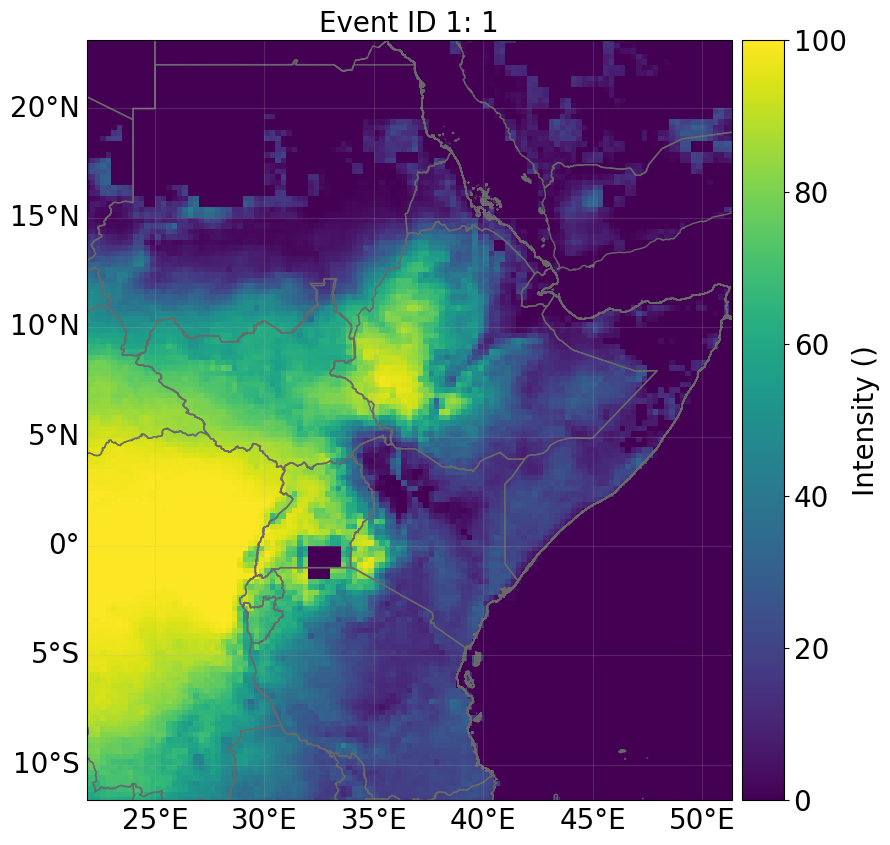

In [36]:
haz_ven.intensity[haz_ven.intensity==-9999] = 0
haz_ven.plot_intensity(1, smooth=False) 

In [37]:
from climada.entity import Exposures

import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
#from Configuration import *
import os
import pandas as pd

import cartopy.crs as ccrs

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

#file_path = lp_csv_files[5] # define the full file path of the CSV-file

file_path='/home/ea_agr_spam.csv'


#file_path='/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_climada/KEN_2021.csv'
new_exp = Exposures(pd.read_csv(file_path))
new_exp.check()

#norm = colors.LogNorm(vmin=500, vmax=4.0e8)

#ax=new_exp.plot_hexbin(norm=norm, pop_name=False, cmap='RdBu_r', buffer=1)

#fname='/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_ibf_data_resources/exposure-data/gis/ea_global_background.shp'

#ax.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),facecolor='None')

#plt.savefig('/home/ea_agr_spam.png', bbox_inches='tight')


In [50]:
from climada.engine import Impact

imp_drought = Impact()

"""Calculate Damage for a specific event"""
imp_drought.calc(new_exp, imp_set_xlsx, haz_ven)

2022-11-25 02:01:46,946 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2022-11-25 02:01:46,955 - climada.hazard.base - WARNING - Impact function id=1 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


In [52]:
index_event_start = imp_drought.event_name.index('1')
damages_drought = np.asarray([imp_drought.at_event[index_event_start]])
print(damages_drought)

[1.75872388e+10]


<GeoAxesSubplot:title={'center':'Expected annual impact'}>

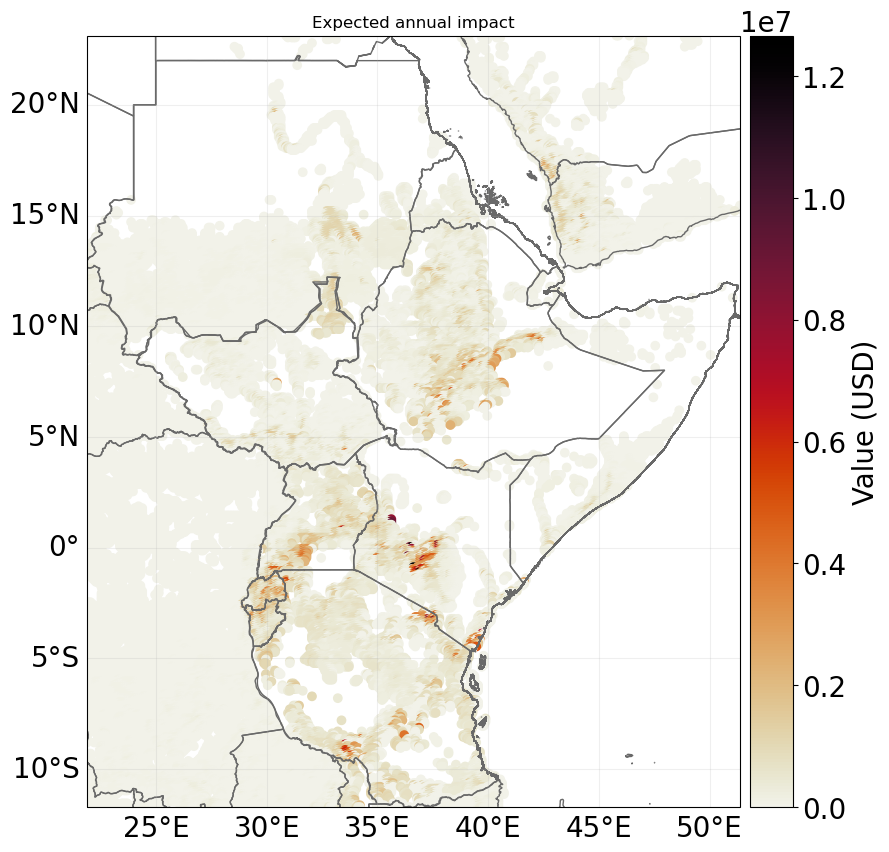

In [53]:
imp_drought.plot_scatter_eai_exposure(pop_name=False)

In [55]:
imp_drought.write_csv('/home/drought_test.csv')

In [107]:
db=pd.read_csv('/home/drought_test.csv')
db1=db[['eai_exp','exp_lat','exp_lon']]
db1

g_db1 = gp.GeoDataFrame(db1, geometry=gp.points_from_xy(db1.exp_lon, db1.exp_lat))
g_db1

,eai_exp,exp_lat,exp_lon,geometry
0,0.00,23.125000,30.875000,POINT (30.87500 23.12500)
1,0.00,23.125000,30.958333,POINT (30.95833 23.12500)
2,0.00,23.125000,31.041667,POINT (31.04167 23.12500)
3,0.00,23.125000,31.125000,POINT (31.12500 23.12500)
4,0.00,23.125000,32.875000,POINT (32.87500 23.12500)
...,...,...,...,...
40802,62415.95,-11.708333,40.125000,POINT (40.12500 -11.70833)
40803,80810.00,-11.708333,40.208333,POINT (40.20833 -11.70833)
40804,52684.50,-11.708333,40.291667,POINT (40.29167 -11.70833)
40805,42482.85,-11.708333,40.375000,POINT (40.37500 -11.70833)


In [59]:
30.958333-30.875000

0.08333299999999966

## get probablity map 

In [61]:
dbpath=f'{data_path}/20220820/prob_lower_tercile_OND2022_20220821_21.838949_51.415695_-11.745695_23.145147.nc'

db1=xr.open_dataset(dbpath)
db1

<xarray.Dataset>
Dimensions:                        (longitude: 119, latitude: 140)
Coordinates:
  * longitude                      (longitude) float32 21.88 22.12 ... 51.38
  * latitude                       (latitude) float32 -11.62 -11.38 ... 23.12
Data variables:
    __xarray_dataarray_variable__  (longitude, latitude) float64 ...

In [104]:
erf=db1.to_dataframe()

erf1=erf.reset_index()

import geopandas as gp

gdf1 = gp.GeoDataFrame(erf1, geometry=gp.points_from_xy(erf1.longitude, erf1.latitude))

#gdf1=gdf[0:12]

gdf1['polygon']=gdf1.geometry.apply(lambda g: g.buffer(0.125, cap_style=3))

gdf2=gdf1[['__xarray_dataarray_variable__','polygon']]
gdf2.columns=['prob_wrsi','geometry']
#gdf1

In [105]:
gdf2

,prob_wrsi,geometry
0,0.808986,"POLYGON ((22.00000 -11.50000, 22.00000 -11.750..."
1,0.758946,"POLYGON ((22.00000 -11.25000, 22.00000 -11.500..."
2,0.706094,"POLYGON ((22.00000 -11.00000, 22.00000 -11.250..."
3,0.780830,"POLYGON ((22.00000 -10.75000, 22.00000 -11.000..."
4,0.786450,"POLYGON ((22.00000 -10.50000, 22.00000 -10.750..."
...,...,...
16655,NaN,"POLYGON ((51.50000 22.25000, 51.50000 22.00000..."
16656,NaN,"POLYGON ((51.50000 22.50000, 51.50000 22.25000..."
16657,NaN,"POLYGON ((51.50000 22.75000, 51.50000 22.50000..."
16658,NaN,"POLYGON ((51.50000 23.00000, 51.50000 22.75000..."


In [108]:
wsd=gdf2.sjoin(g_db1)

In [109]:
wsd

,prob_wrsi,geometry,index_right,eai_exp,exp_lat,exp_lon
0,0.808986,"POLYGON ((22.00000 -11.50000, 22.00000 -11.750...",40400,8781.580998,-11.541667,21.958333
0,0.808986,"POLYGON ((22.00000 -11.50000, 22.00000 -11.750...",40399,555.698219,-11.541667,21.875000
1,0.758946,"POLYGON ((22.00000 -11.25000, 22.00000 -11.500...",40259,593.289872,-11.458333,21.958333
1,0.758946,"POLYGON ((22.00000 -11.25000, 22.00000 -11.500...",40134,3099.838877,-11.375000,21.958333
1,0.758946,"POLYGON ((22.00000 -11.25000, 22.00000 -11.500...",40133,1133.945169,-11.375000,21.875000
...,...,...,...,...,...,...
16487,NaN,"POLYGON ((51.25000 15.25000, 51.25000 15.00000...",2548,286262.900000,15.208333,51.125000
16628,0.011540,"POLYGON ((51.50000 15.50000, 51.50000 15.25000...",2372,9436.500000,15.375000,51.375000
16628,0.011540,"POLYGON ((51.50000 15.50000, 51.50000 15.25000...",2288,10710.250000,15.458333,51.375000
16628,0.011540,"POLYGON ((51.50000 15.50000, 51.50000 15.25000...",2461,3570.650000,15.291667,51.375000


In [110]:
g_db1

,eai_exp,exp_lat,exp_lon,geometry
0,0.00,23.125000,30.875000,POINT (30.87500 23.12500)
1,0.00,23.125000,30.958333,POINT (30.95833 23.12500)
2,0.00,23.125000,31.041667,POINT (31.04167 23.12500)
3,0.00,23.125000,31.125000,POINT (31.12500 23.12500)
4,0.00,23.125000,32.875000,POINT (32.87500 23.12500)
...,...,...,...,...
40802,62415.95,-11.708333,40.125000,POINT (40.12500 -11.70833)
40803,80810.00,-11.708333,40.208333,POINT (40.20833 -11.70833)
40804,52684.50,-11.708333,40.291667,POINT (40.29167 -11.70833)
40805,42482.85,-11.708333,40.375000,POINT (40.37500 -11.70833)


In [111]:
exp_db=pd.read_csv('/home/ea_agr_spam.csv')

In [118]:
exp_db['value'].mean(),exp_db['value'].max(),exp_db['value'].min()

(687169.0092141014, 29619070.9, 28.3)

In [145]:
# def get_prob_ibf(row):
#     #if row['prob_wrsi'].between(0, 0.25) & row['eai_exp'].between(0, 68716.9):
#     aa=int(row['prob_wrsi'])
#     if aa.between(0, 0.25):
#         a=10    
#     return a


#wsd['ibf']=wsd.apply(lambda row: get_prob_ibf(row), axis = 1)
#df['multiply'] = df.apply(lambda row: multiply(row), axis = 1)



def get_prob_ibf(row):
    #print(row['prob_wrsi'],row['eai_exp'])
    if 0.0<= row['prob_wrsi'] <=0.25 and 0.0<= row['eai_exp'] <= 68716.9:
        a=10    
    if 0.25<= row['prob_wrsi'] <=0.5 and 0.0<= row['eai_exp'] <= 68716.9:
        a=10    
    if 0.5<= row['prob_wrsi'] <=0.75 and 0.0<= row['eai_exp'] <= 68716.9:
        a=10    
    if 0.75<= row['prob_wrsi'] <=1 and 0.0<= row['eai_exp'] <= 68716.9:
        a=10    
    ########
    if 0.0<= row['prob_wrsi'] <=0.25 and 68716.9<= row['eai_exp'] <= 687169:
        a=10    
    if 0.25<= row['prob_wrsi'] <=0.5 and 68716.9<= row['eai_exp'] <= 687169:
        a=10    
    if 0.5<= row['prob_wrsi'] <=0.75 and 68716.9<= row['eai_exp'] <= 687169:
        a=20    
    if 0.75<= row['prob_wrsi'] <=1 and 68716.9<= row['eai_exp'] <= 687169:
        a=20    
    ########
    if 0.0<= row['prob_wrsi'] <=0.25 and 687169<= row['eai_exp'] <=296190.70:
        a=20    
    if 0.25<= row['prob_wrsi'] <=0.5 and 687169<= row['eai_exp'] <= 296190.70:
        a=20    
    if 0.5<= row['prob_wrsi'] <=0.75 and 687169<= row['eai_exp'] <= 296190.70:
        a=30    
    if 0.75<= row['prob_wrsi'] <=1 and 687169<= row['eai_exp'] <= 296190.70:
        a=30    
    ########
    if 0.0<= row['prob_wrsi'] <=0.25 and 296190.70<= row['eai_exp'] <=29619070:
        a=20    
    if 0.25<= row['prob_wrsi'] <=0.5 and 296190.70<= row['eai_exp'] <= 29619070:
        a=30    
    if 0.5<= row['prob_wrsi'] <=0.75 and 296190.70<= row['eai_exp'] <= 29619070:
        a=30    
    if 0.75<= row['prob_wrsi'] <=1 and 296190.70<= row['eai_exp'] <= 29619070:
        a=40
    ########
    if row['prob_wrsi'] is None and row['eai_exp'] is None: 
        a=np.nan
    if row['prob_wrsi'] is None or row['eai_exp'] is None: 
        a=np.nan 
    if pd.isna(row['prob_wrsi']):
        a=np.nan
    return a

wsd['ibf']=wsd.apply(lambda row: get_prob_ibf(row), axis = 1)
wsd

,prob_wrsi,geometry,index_right,eai_exp,exp_lat,exp_lon,ibf
0,0.808986,"POLYGON ((22.00000 -11.50000, 22.00000 -11.750...",40400,8781.580998,-11.541667,21.958333,10.0
0,0.808986,"POLYGON ((22.00000 -11.50000, 22.00000 -11.750...",40399,555.698219,-11.541667,21.875000,10.0
1,0.758946,"POLYGON ((22.00000 -11.25000, 22.00000 -11.500...",40259,593.289872,-11.458333,21.958333,10.0
1,0.758946,"POLYGON ((22.00000 -11.25000, 22.00000 -11.500...",40134,3099.838877,-11.375000,21.958333,10.0
1,0.758946,"POLYGON ((22.00000 -11.25000, 22.00000 -11.500...",40133,1133.945169,-11.375000,21.875000,10.0
...,...,...,...,...,...,...,...
16487,NaN,"POLYGON ((51.25000 15.25000, 51.25000 15.00000...",2548,286262.900000,15.208333,51.125000,NaN
16628,0.011540,"POLYGON ((51.50000 15.50000, 51.50000 15.25000...",2372,9436.500000,15.375000,51.375000,10.0
16628,0.011540,"POLYGON ((51.50000 15.50000, 51.50000 15.25000...",2288,10710.250000,15.458333,51.375000,10.0
16628,0.011540,"POLYGON ((51.50000 15.50000, 51.50000 15.25000...",2461,3570.650000,15.291667,51.375000,10.0


In [149]:
wsd1=wsd[['exp_lat','exp_lon','ibf']]
wsd1.columns=['latitude','longitude','value']

wsd1['region_id']=1
#wsd1.groupby(['value']).count()

,latitude,longitude,region_id
value,,,
10.0,25761,25761,25761
20.0,5531,5531,5531
30.0,2872,2872,2872
40.0,4115,4115,4115


In [150]:
wsd1.to_csv('/home/ibf_output.csv',index=False)

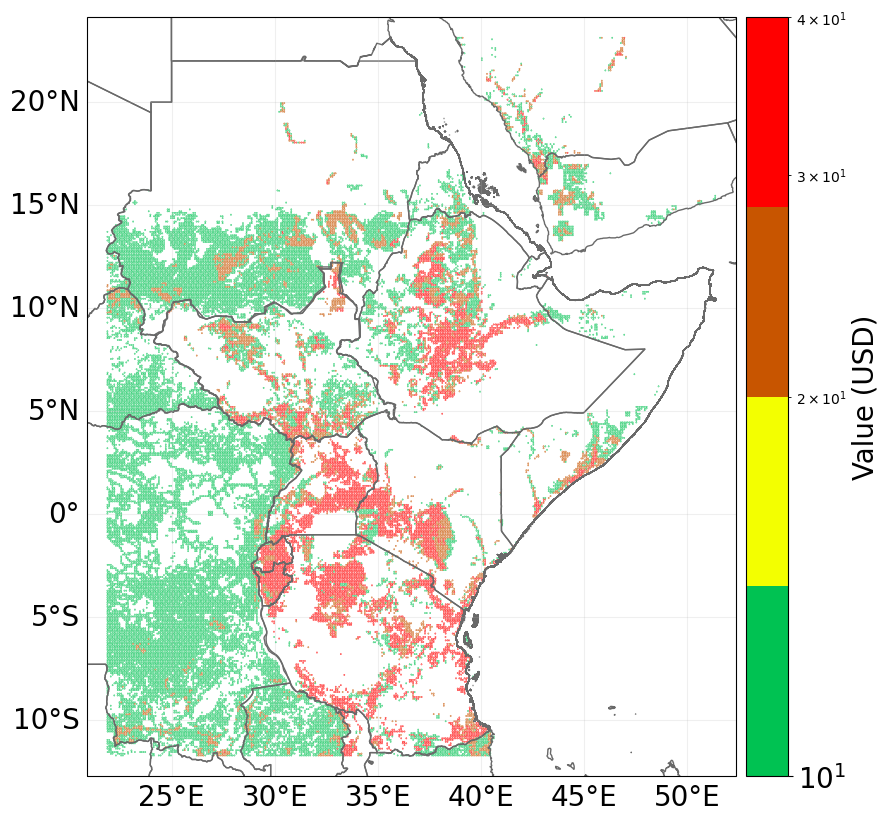

In [5]:
from climada.entity import Exposures
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
#from Configuration import *
import os
import pandas as pd

import cartopy.crs as ccrs

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

#file_path = lp_csv_files[5] # define the full file path of the CSV-file

file_path='/home/ibf_output.csv'


def return_colormap():
    """
    Create colormap of matplotlib based on number of class and given colorcode

    Parameters
    ----------
    params : class object
        Input/Output parameter definitions.
        
    Returns
    -------
    c_cmap : Object
        matplotlib colormap.

    """
    c = matplotlib.colors.ColorConverter().to_rgb
    colorlist=[c("#00c252"), c("#f3ff00"), c("#c85500"), c("#ff0000")]
    color_code=colorlist
    classif= [10, 20, 30, 40]
    c_cmap = LinearSegmentedColormap.from_list("my_colormap",color_code, N=len(classif), gamma=1.0)
    return c_cmap



#file_path='/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_climada/KEN_2021.csv'
new_exp = Exposures(pd.read_csv(file_path))
new_exp.check()

norm = colors.LogNorm(vmin=10, vmax=40)

c_cmap=return_colormap()

ax=new_exp.plot_hexbin(norm=norm, pop_name=False, cmap=c_cmap, buffer=1)

#fname='/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_ibf_data_resources/exposure-data/gis/ea_global_background.shp'

#ax.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),facecolor='None')

#plt.savefig('/home/ibf.png', bbox_inches='tight')


In [2]:
db=pd.read_csv('/home/ibf_output.csv')

db

,latitude,longitude,value,region_id
0,-11.541667,21.958333,10.0,1
1,-11.541667,21.875000,10.0,1
2,-11.458333,21.958333,10.0,1
3,-11.375000,21.958333,10.0,1
4,-11.375000,21.875000,10.0,1
...,...,...,...,...
40802,15.208333,51.125000,NaN,1
40803,15.375000,51.375000,10.0,1
40804,15.458333,51.375000,10.0,1
40805,15.291667,51.375000,10.0,1
